## Set up likelihood

Basic syntax to set up a default likelihood object for the Australia20 suite

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
import numpy as np
# our modules
import likelihood
import data_MPGADGET
import gp_emulator
import p1d_arxiv

Setup mock data, from one of simulations in the suite

In [2]:
# specify simulation to use to generate synthetic data
test_sim_label='nu'
if type(test_sim_label)==int:
    drop_sim_number=test_sim_label
    print('will drop sim number {} from emulator'.format(drop_sim_number))
else:
    drop_sim_number=None

In [3]:
# specify simulation suite and P1D mesurements
basedir="/p1d_emulator/sim_suites/Australia20/"
skewers_label='Ns500_wM0.05'
p1d_label=None
z_max=4.0
data=data_MPGADGET.P1D_MPGADGET(basedir=basedir,
                                skewers_label=skewers_label,
                                sim_label=test_sim_label,
                                zmax=z_max)

Sim has neutrinos
H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.2000E-01, Omega_k = -5.5511E-17, Omega_nu h^2 = 3.2257E-03, A_s = 2.2507E-09, n_s = 9.6757E-01, alpha_s = 0.0000E+00


Setup archive of P1D measurements from simulations to train the emulator

In [4]:
# do not use test_sim_num that was used in generating mock data
arxiv=p1d_arxiv.ArxivP1D(basedir=basedir,skewers_label=skewers_label,
                         drop_sim_number=drop_sim_number,z_max=z_max,
                         drop_tau_rescalings=True,
                         drop_temp_rescalings=True)

In [5]:
# specify parameters to be used in emulator
paramList=['mF', 'sigT_Mpc', 'gamma', 'kF_Mpc', 'Delta2_p', 'n_p']
# specify k range
kmax_Mpc=8
# setup GP emulator
emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                           z_max=z_max,verbose=False,paramList=paramList,
                           train=False,emu_type="k_bin",passArxiv=arxiv,
                           kmax_Mpc=kmax_Mpc)
emu.load_default()

 /Users/font/opt/anaconda3/envs/lya_cosmo/lib/python3.8/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Setup likelihood and free parameters

In [6]:
# Likelihood parameters
like_params=["Delta2_star","n_star","ln_tau_0","ln_tau_1","ln_sigT_kms_0","ln_sigT_kms_1",
             "ln_gamma_0","ln_gamma_1","ln_kF_0","ln_kF_1"]
like_param_limits=[[0.24, 0.47], [-2.352, -2.25], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], 
                   [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2]]

In [7]:
like=likelihood.Likelihood(data=data,emulator=emu,
                            free_param_names=like_params,
                            free_param_limits=like_param_limits,
                            verbose=False,
                            prior_Gauss_rms=-1)

In [8]:
## Evaluate log_prob at random point in parameter space
random_values=np.random.uniform(0,1,len(like.free_params))
like.log_prob(random_values)

-131.43600365622612

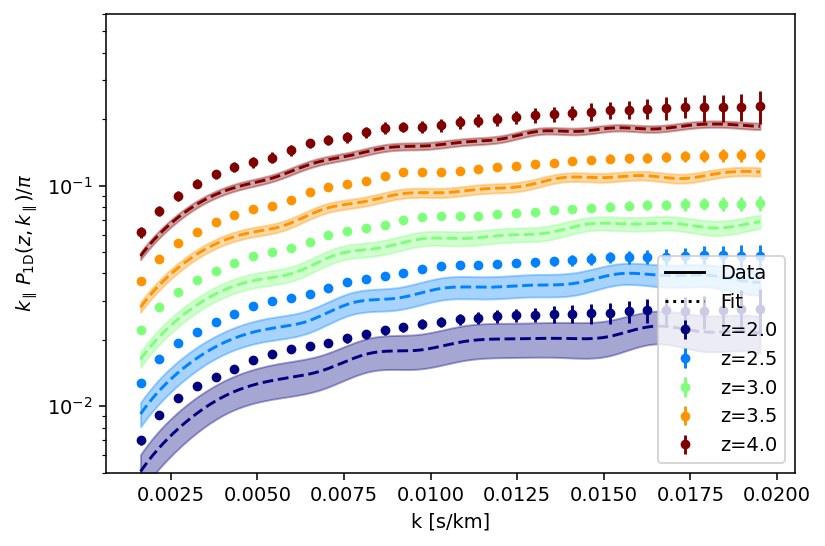

In [9]:
like.plot_p1d(random_values,plot_every_iz=2)

## Set up a likelihood object using Planck parameters
I have modified the code such that from the `free_param_names` list alone, the `likelihood` object will be able to determine whether to set up a `LyaTheory` or a `FullTheory` object. Test this out!

In [10]:
like_params=["H0","ns","ln_tau_0","ln_tau_1","ln_sigT_kms_0","ln_sigT_kms_1",
             "ln_gamma_0","ln_gamma_1","ln_kF_0","ln_kF_1"]
like_param_limits=[[65, 75], [0.9,0.99], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], 
                   [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2]]

In [11]:
like_full=likelihood.Likelihood(data=data,emulator=emu,
                            free_param_names=like_params,
                            free_param_limits=like_param_limits,
                            verbose=False,
                            prior_Gauss_rms=-1)

In [12]:
## Evaluate log_prob at random point in parameter space
random_values=np.random.uniform(0,1,len(like.free_params))
like.log_prob(random_values)

-66.083633801883

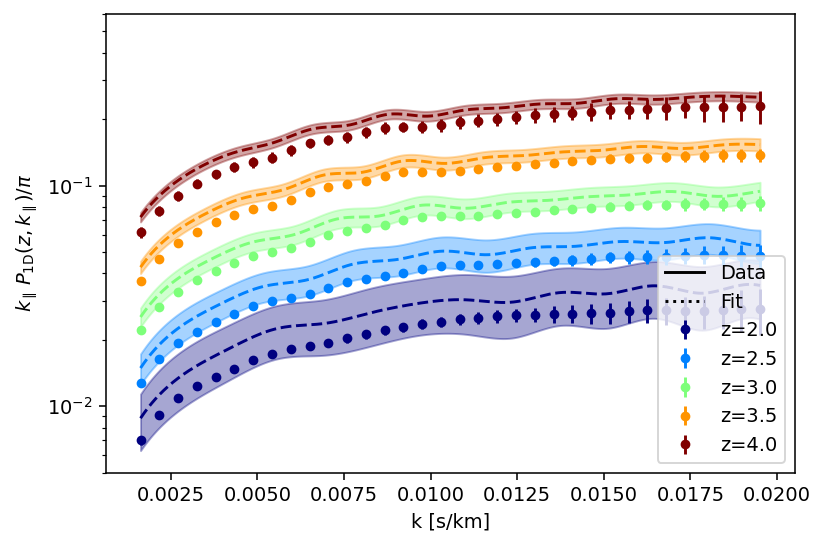

In [14]:
like.plot_p1d(random_values,plot_every_iz=2)